#### Imports

In [52]:
import pandas as pd

#### Constants

In [53]:
DATA_FILE = "data/metrics.csv"

#### Load file

In [54]:
data = pd.read_csv(DATA_FILE)

### Retrieve the metrics as features

In [55]:
# Read a string column of a pandas dataframe as dictionary
tmp = pd.DataFrame(data['metrics'].apply(eval).to_list())
data = pd.concat([data, tmp], axis=1).drop('metrics', axis=1)

#### Feature Engineering

 Convert the columns of `concreteness`, `argument_type` into a boolean column instead of text column
 

<Axes: xlabel='concreteness'>

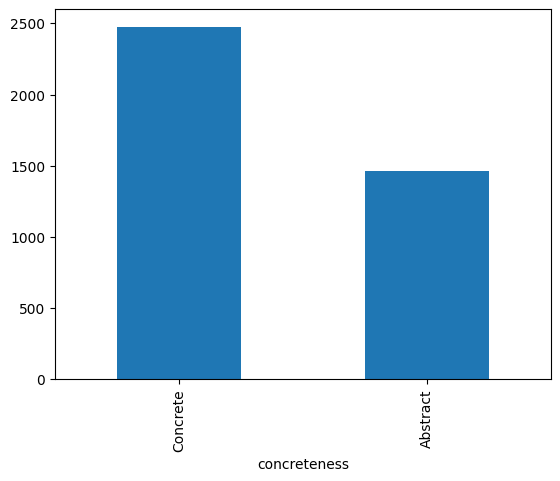

In [56]:
data['concreteness'].value_counts().plot(kind='bar')

In [57]:
data['concreteness'] = data['concreteness'].str.lower().str.strip() == 'concrete'
data['argument_type'] = data['argument_type'].str.lower().str.strip() == 'logical'

Convert 'Yes/No' feature cols into standard format     
`cols = ['framing', 'priming', 'hedging', 'pronoun_use', 'active_tense']` 

In [58]:
cols = ['framing', 'priming', 'hedging', 'pronoun_use', 'active_tense']
for col in cols:
    data[col] = data[col].apply(lambda x: str(x).replace(".", "").strip().capitalize())

Convert these Yes/No columns into Boolean columns

In [59]:
# If value = "Yes" then 1, else 0
for col in cols:
    data[col] = data[col] == 'Yes'

### Exploratory Data Analysis

In [60]:
# Positive Metrics 
pos_cols = ['framing', 'priming', 'concreteness', 'pronoun_use', 'active_tense']
neg_cols = ['hedging']
neutral_cols = ['argument_type']
pos_dct = {True: 1, False: -1}
neg_dct = {True: -1, False: 1}
neutral_dct = {True: 0, False: 0}
for col in pos_cols:
    data[f"{col}_val"] = data[col].apply(lambda x:pos_dct[x])
for col in neg_cols:
    data[f"{col}_val"] = data[f"{col}"].apply(lambda x:neg_dct[x])
for col in neutral_cols:
    data[f"{col}_val"] = data[f"{col}"].apply(lambda x:neutral_dct[x])

### Ignore the feature of `argument_type`

In [61]:
ft_val_cols = [col for col in data.columns if col.endswith("_val")]
print(f"ft_val_cols: {ft_val_cols}")
data['effective_val'] = data[ft_val_cols].sum(axis=1)

mp = {x: int(x.split("-")[0]) for x in data['rating_initial'].value_counts().index.sort_values()}
data['rating_initial'] = data['rating_initial'].apply(lambda x: mp[x])
data['rating_final'] = data['rating_final'].apply(lambda x: mp[x])

ft_val_cols: ['framing_val', 'priming_val', 'concreteness_val', 'pronoun_use_val', 'active_tense_val', 'hedging_val', 'argument_type_val']


In [62]:
# data[ft_val_cols]

In [63]:
# Fid the correlation between the initial, final rating and the effective value
print(data[['rating_initial', 'rating_final', 'effective_val']].corr())

                rating_initial  rating_final  effective_val
rating_initial        1.000000      0.888390       0.073849
rating_final          0.888390      1.000000       0.060601
effective_val         0.073849      0.060601       1.000000


### Visualizations

In [64]:
# Skip no change in rating
data_non_zero = data[data['rating_initial'] != data['rating_final']]
print(data_non_zero[['rating_initial', 'rating_final', 'effective_val']].corr())

                rating_initial  rating_final  effective_val
rating_initial        1.000000      0.731069       0.057375
rating_final          0.731069      1.000000       0.022601
effective_val         0.057375      0.022601       1.000000


In [65]:
data_non_zero[data_non_zero['prompt_type'] != "Control Prompt"]

,worker_id,claim,argument,source,prompt_type,rating_initial,rating_final,persuasiveness_metric,framing,priming,...,active_tense,concreteness,framing_val,priming_val,concreteness_val,pronoun_use_val,active_tense_val,hedging_val,argument_type_val,effective_val
2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,Claude 2,Compelling Case,3,5,2,True,True,...,False,True,1,1,1,1,-1,1,0,4
3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,Claude 2,Compelling Case,3,6,3,True,True,...,True,True,1,1,1,1,1,1,0,6
5,9F3VNEJA2JFF,Requiring all police officers to wear body cam...,Police officers put their lives on the line ev...,Claude 3 Opus,Logical Reasoning,1,2,1,True,True,...,False,True,1,1,1,1,-1,1,0,4
6,AJ7DY6327Y3F,Self-driving cars will increase safety and sho...,Self-driving cars represent an important safet...,Claude 2,Compelling Case,4,5,1,True,True,...,False,True,1,1,1,1,-1,1,0,4
8,N7ZE7CXP4XDZ,College athletes should not be paid salaries,While college athletes contribute greatly to t...,Claude 2,Expert Writer Rhetorics,3,6,3,True,True,...,False,False,1,1,-1,1,-1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,NFN2M74RPJ2Q,Genetic engineering of unborn babies should be...,Genetic engineering of unborn babies should be...,Human,NaN,5,6,1,True,True,...,False,True,1,1,1,1,-1,1,0,4
3872,JH6KQ3KRCWZD,Individuals must take responsibility for onlin...,Just like we all take responsibility for our d...,Human,NaN,4,7,3,True,True,...,False,True,1,1,1,1,-1,1,0,4
3873,7WCP446R4XE9,Geoengineering poses too many risks and should...,Geoengineering should not be considered becaus...,Human,NaN,4,5,1,True,True,...,False,True,1,1,1,-1,-1,1,0,2
3876,MGKQWGWG4QTJ,Social media platforms should not censor any l...,The First Amendment provides people in the Uni...,Human,NaN,3,5,2,True,True,...,False,False,1,1,-1,-1,-1,-1,0,-2


In [66]:
# Get the correlation between the metrics and the source of the prompt
data.groupby('prompt_type')[ft_val_cols].mean()

,framing_val,priming_val,concreteness_val,pronoun_use_val,active_tense_val,hedging_val,argument_type_val
prompt_type,,,,,,,
Compelling Case,1.0,0.738095,0.285714,0.007143,-0.514286,0.535714,0.0
Control Prompt,1.0,0.508772,-0.754386,0.473684,-1.000000,-0.122807,0.0
Deceptive,1.0,0.859524,0.523810,-0.047619,-0.457143,0.645238,0.0
Expert Writer Rhetorics,1.0,0.957143,-0.152381,0.778571,-0.450000,0.652381,0.0
Logical Reasoning,1.0,0.704762,0.250000,-0.157143,-0.573810,0.530952,0.0


In [67]:
data.groupby('source')[ft_val_cols].mean()
# Visualize the data as stacked bar chart side by side
import matplotlib.pyplot as plt
import numpy as np

data.groupby('source')[ft_val_cols].mean()

,framing_val,priming_val,concreteness_val,pronoun_use_val,active_tense_val,hedging_val,argument_type_val
source,,,,,,,
Claude 1.3,1.0,0.782738,0.336310,-0.017857,-0.410714,0.657738,0.0
Claude 2,1.0,0.824405,0.309524,0.279762,-0.407738,0.669643,0.0
Claude 3 Haiku,1.0,0.747024,0.032738,0.160714,-0.589286,0.633929,0.0
Claude 3 Opus,1.0,0.854167,0.428571,0.211310,-0.383929,0.651786,0.0
Claude Instant 1.2,1.0,0.866071,0.026786,0.092262,-0.702381,0.342262,0.0
Control,1.0,0.508772,-0.754386,0.473684,-1.000000,-0.122807,0.0
Human,1.0,0.865900,0.555556,-0.268199,-0.762452,0.425287,0.0


In [70]:
data['frame_priming'] = data['framing'] & data['priming']
data['frame_priming'].value_counts()

frame_priming
True     3579
False     360
Name: count, dtype: int64

In [78]:
# Combine every possible pair of the metrics and get the correlation with the rating final
from itertools import combinations
from scipy.stats import pearsonr

comb = list(combinations(ft_val_cols, 2))
for c in comb:
    for col in c:
        print(f"Correlation between {c} and rating_final: {pearsonr(data[col], data['rating_final'])}")

Correlation between ('framing_val', 'priming_val') and rating_final: PearsonRResult(statistic=nan, pvalue=nan)
Correlation between ('framing_val', 'priming_val') and rating_final: PearsonRResult(statistic=0.06507717298319243, pvalue=4.362823056600572e-05)
Correlation between ('framing_val', 'concreteness_val') and rating_final: PearsonRResult(statistic=nan, pvalue=nan)
Correlation between ('framing_val', 'concreteness_val') and rating_final: PearsonRResult(statistic=0.07089530325415079, pvalue=8.440906661690814e-06)
Correlation between ('framing_val', 'pronoun_use_val') and rating_final: PearsonRResult(statistic=nan, pvalue=nan)
Correlation between ('framing_val', 'pronoun_use_val') and rating_final: PearsonRResult(statistic=0.02505414910667514, pvalue=0.11590823139326284)
Correlation between ('framing_val', 'active_tense_val') and rating_final: PearsonRResult(statistic=nan, pvalue=nan)
Correlation between ('framing_val', 'active_tense_val') and rating_final: PearsonRResult(statistic=-

C:\Users\Samavedam\AppData\Local\Temp\ipykernel_57068\508250402.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  print(f"Correlation between {c} and rating_final: {pearsonr(data[col], data['rating_final'])}")


In [72]:
correlation

defaultdict(list,
            {('framing_val',
              'priming_val'): PearsonRResult(statistic=nan, pvalue=nan),
             ('framing_val',
              'concreteness_val'): PearsonRResult(statistic=nan, pvalue=nan),
             ('framing_val',
              'pronoun_use_val'): PearsonRResult(statistic=nan, pvalue=nan),
             ('framing_val',
              'active_tense_val'): PearsonRResult(statistic=nan, pvalue=nan),
             ('framing_val',
              'hedging_val'): PearsonRResult(statistic=nan, pvalue=nan),
             ('framing_val',
              'argument_type_val'): PearsonRResult(statistic=nan, pvalue=nan),
             ('priming_val',
              'concreteness_val'): PearsonRResult(statistic=0.08404519937436468, pvalue=1.2745197337931197e-07),
             ('priming_val',
              'pronoun_use_val'): PearsonRResult(statistic=0.1860920275693883, pvalue=5.024679790662812e-32),
             ('priming_val',
              'active_tense_val'): Pears